In [47]:
import sys
sys.path.insert(0, '../../')
import ccob_qe_analysis as qe
import ccob_utils as u
import os
import glob
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
led_names = ['red']
config_file_data = '../../ccob_config_RTM-006.yaml'
config_data = u.load_ccob_config(config_file_data)
led = led_names[0]

xpos = [253.0]
ypos = [237.0]
slot_names=['00']
ccd_pos_dict={}
u.define_ccd_pos(ccd_pos_dict, 'RTM-006', slot_names, xpos, ypos)        


In [44]:
slot='00'
bias_files = glob.glob(os.path.join(config_data['path']+'/'+led, slot+'_bias*'))
outfile = os.path.join(config_data['tmp_dir'],'{}_superbias.fits'.format(slot))
u.make_superbias_frame(bias_files, slot, outfile)

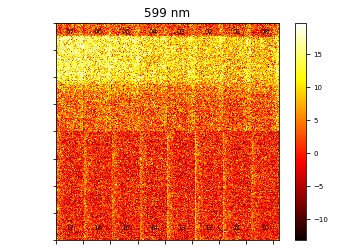

In [48]:
sensorTest.plot_flat(outfile)


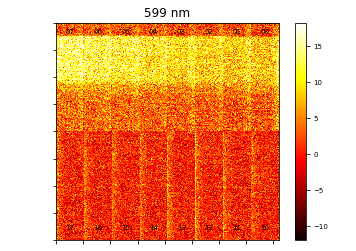

In [50]:
sensorTest.plot_flat(os.path.join(config_data['tmp_dir'],slot+'_mean_bias_image_RTM-006_new.fits'))

In [82]:
mean_bias_file = os.path.join(config_data['tmp_dir'],slot+'_mean_bias_image_RTM-006_new.fits')
mosaic1, amp_coord =  u.make_ccd_2d_array(mean_bias_file)

In [83]:
mosaic2, amp_coord =  u.make_ccd_2d_array(outfile)

In [84]:
mosaic3, amp_coord =  u.make_ccd_2d_array(mean_bias_file, biasfile=outfile) # should be the same as mosaic1-mosaic2

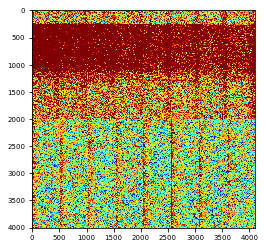

In [85]:
plt.imshow(mosaic1, vmin=-7, vmax=7)

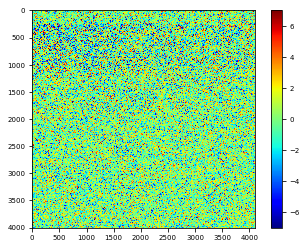

In [86]:
plt.imshow(mosaic1-mosaic2, vmin=-7, vmax=7)
plt.colorbar()

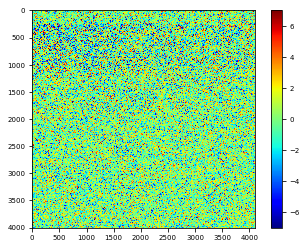

In [87]:
plt.imshow(mosaic3, vmin=-7, vmax=7)
plt.colorbar()